In [32]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import re 
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_train = pd.read_csv('E:/text_emotion_nlp/data/data_train.csv')
df_test = pd.read_csv('E:/text_emotion_nlp/data/data_test.csv')

In [3]:
df_train.head()

,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...


In [4]:
df = df_train.append(df_test)

In [5]:
df.shape

(11327, 2)

In [6]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [7]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [8]:
# value count of emoj

df['Emotion'].value_counts()

joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

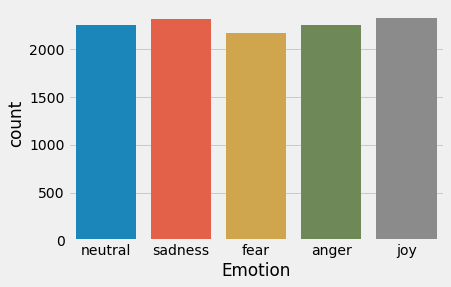

In [9]:
sns.countplot(df.Emotion)

### Exploration 
+ Text cleaning
+ Sentiment analysis
+ Keywords Extraction
    - keyword for each emotion
    - wordcloud


In [10]:
# !! pip install textblob

In [11]:
df['Text_Clean'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
df['Text_Clean'] = df['Text_Clean'].str.replace('[^\w\s]',' ')

In [13]:
stop = stopwords.words('english')
df['Text_Clean'] = df['Text_Clean'].apply(lambda x: " ".join(x.lower() for x in x.split() if x not in stop))

In [14]:
df['Text_Clean'].head()

0                          tons paintings think better
1    yet dog grown old less capable one day gillie ...
2                 get tube train without paying ticket
3    last may source considerable disquiet one migh...
4    disliked intimacy showed towards resentful mem...
Name: Text_Clean, dtype: object

In [15]:
#Sentiment analysis
from textblob import TextBlob
from textblob import Word

In [16]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0 :
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = 'Neutral'
    return result

In [17]:
# test the fun 
get_sentiment('i love football')

'Positive'

In [18]:
get_sentiment('i hate volley')

'Negative'

In [19]:
get_sentiment('hello')

'Neutral'

In [20]:
df['Sentiment'] = df.Text.apply(get_sentiment)


In [21]:
df.head()

,Emotion,Text,Text_Clean,Sentiment
0,neutral,There are tons of other paintings that I thin...,tons paintings think better,Positive
1,sadness,"Yet the dog had grown old and less capable , a...",yet dog grown old less capable one day gillie ...,Positive
2,fear,When I get into the tube or the train without ...,get tube train without paying ticket,Neutral
3,fear,This last may be a source of considerable disq...,last may source considerable disquiet one migh...,Positive
4,anger,She disliked the intimacy he showed towards so...,disliked intimacy showed towards resentful mem...,Negative


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

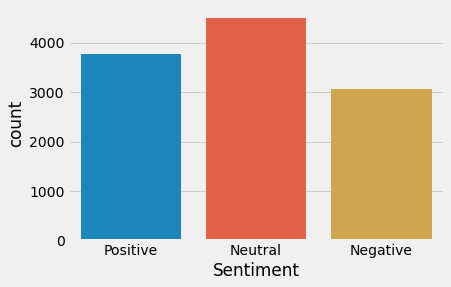

In [22]:
sns.countplot(df.Sentiment)

In [23]:
#Compare our emotion Vs Sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion  Sentiment
anger    Negative      925
         Neutral       799
         Positive      535
fear     Negative      771
         Neutral       739
         Positive      661
joy      Negative      221
         Neutral       654
         Positive     1451
neutral  Negative      178
         Neutral      1523
         Positive      553
sadness  Negative      967
         Neutral       785
         Positive      565
dtype: int64

<Figure size 1008x576 with 0 Axes>

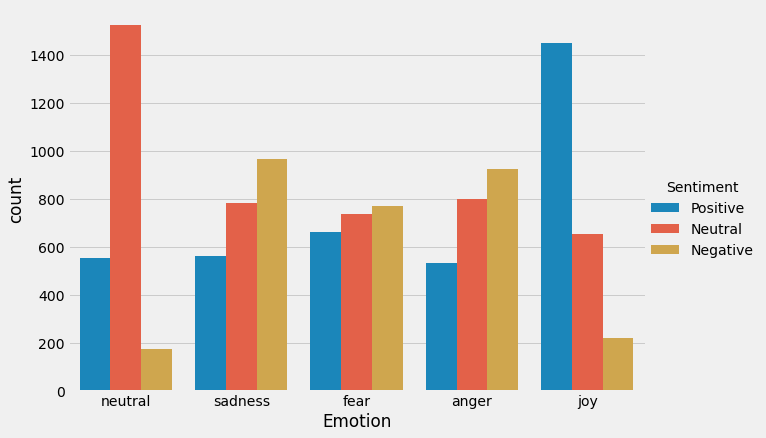

In [24]:
plt.figure(figsize=(14,8))
sns.factorplot(x="Emotion",data=df,hue='Sentiment',kind='count',size=6,aspect=1.5)
plt.show()

### Text Cleanign 
+ Remove noise
    - stopwords
    - specila char
    - punctuations
    - emojs

In [25]:
#NeatText:a simple NLP package for cleaning textual data and text preprocessing
import neattext.functions as nfx
dir(nfx)


['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [26]:
# df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)


In [27]:
# df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)


In [28]:
# df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)


In [29]:
#Lemmatisation
df['Text_Clean'] = df['Text_Clean'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [33]:
def de_repeat(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)


In [34]:
df['Text_Clean'] = df['Text_Clean'].apply(lambda x: " ".join(de_repeat(x) for x in x.split()))


In [35]:
df[['Text','Text_Clean']].head(10)

,Text,Text_Clean
0,There are tons of other paintings that I thin...,ton painting think better
1,"Yet the dog had grown old and less capable , a...",yet dog grown old le capable one day gillie co...
2,When I get into the tube or the train without ...,get tube train without paying ticket
3,This last may be a source of considerable disq...,last may source considerable disquiet one migh...
4,She disliked the intimacy he showed towards so...,disliked intimacy showed towards resentful mem...
5,When my family heard that my Mother's cousin w...,family heard mother cousin life england wrote ...
6,Finding out I am chosen to collect norms for C...,finding chosen collect norm chinese aphasia co...
7,A spokesperson said : ` Glen is furious that t...,spokesperson said glen furious new anarchy pro...
8,Yes .,yes
9,"When I see people with burns I feel sad, actua...",see people burn feel sad actually even express...


### KeyWord Extraction
+ extract most common words per class of emotion

In [36]:
from collections import Counter

In [37]:
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [38]:
emo_list = df['Emotion'].unique().tolist()
emo_list

['neutral', 'sadness', 'fear', 'anger', 'joy']

In [39]:
sadness_list = df[df_train['Emotion']=='sadness']['Text_Clean'].tolist()

In [40]:
sadness_docx = ' '.join(sadness_list)

In [41]:
sadness_docx

'yet dog grown old le capable one day gillie come explained great sorrow dog suffered stroke must put family heard mother cousin life england wrote u tell cancer lymph gland see people burn feel sad actually even express feeling think must suffer lot one day heard friend boy loved gone upon moving away home first time different city felt longer wing parent even though would always help felt sense loss alone world responsible action learnt failed exam influenced emotion also important task also made record imperfect little cat raised hanged playing garden got back felt like black hole groaned disconsolate wilkinson two hour defeat india lost benson hedge cricket trophy case unrequited love death father even though close joe biddy became little cheerful discussing possible plan future became miserable someone mention thing like ration book powdered egg air raid stomach turn feel quite depressed paying attention face might believed deeply shocked anguished expression act put benefit findi

In [42]:
sadness_keywords = extract_keywords(sadness_docx)

In [43]:
sadness_keywords

{'friend': 233,
 'sad': 190,
 'sorry': 177,
 'died': 158,
 'felt': 157,
 'time': 142,
 'one': 133,
 'year': 114,
 'day': 98,
 'know': 98,
 'mother': 97,
 'father': 91,
 'could': 91,
 'home': 86,
 'would': 86,
 'away': 81,
 'go': 81,
 'really': 80,
 'got': 79,
 'death': 78,
 'see': 77,
 'feel': 77,
 'back': 69,
 'left': 67,
 'much': 67,
 'oh': 66,
 'close': 64,
 'told': 62,
 'last': 62,
 'first': 61,
 'like': 60,
 'good': 60,
 'night': 59,
 'well': 57,
 'heard': 56,
 'boyfriend': 56,
 'school': 55,
 'girl': 54,
 'think': 53,
 'love': 53,
 'get': 53,
 'said': 53,
 'car': 53,
 'passed': 52,
 'family': 51,
 'made': 51,
 'feeling': 50,
 'month': 50,
 'went': 50,
 'old': 48}

In [44]:
def plot_most_common_words(mydict):
    df_1 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(14,6))
    sns.barplot(x='token',y='count',data=df_1)
    plt.xticks(rotation=90)
    plt.show()

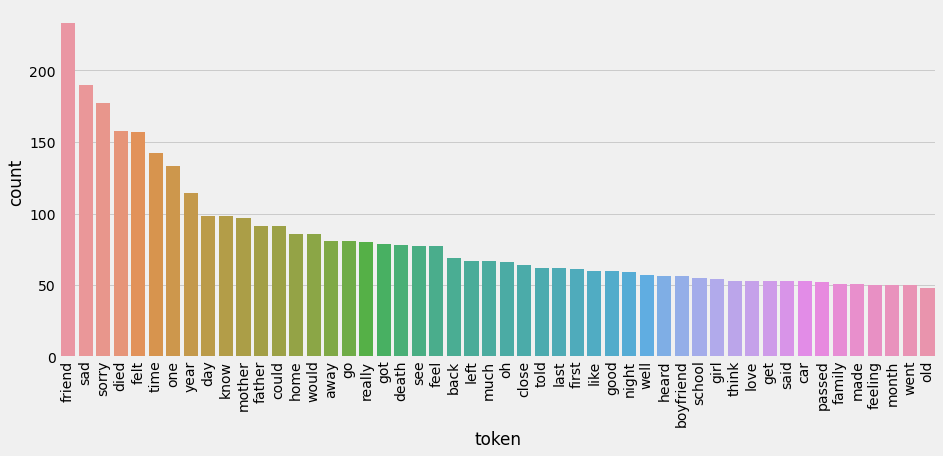

In [45]:
plot_most_common_words(sadness_keywords)

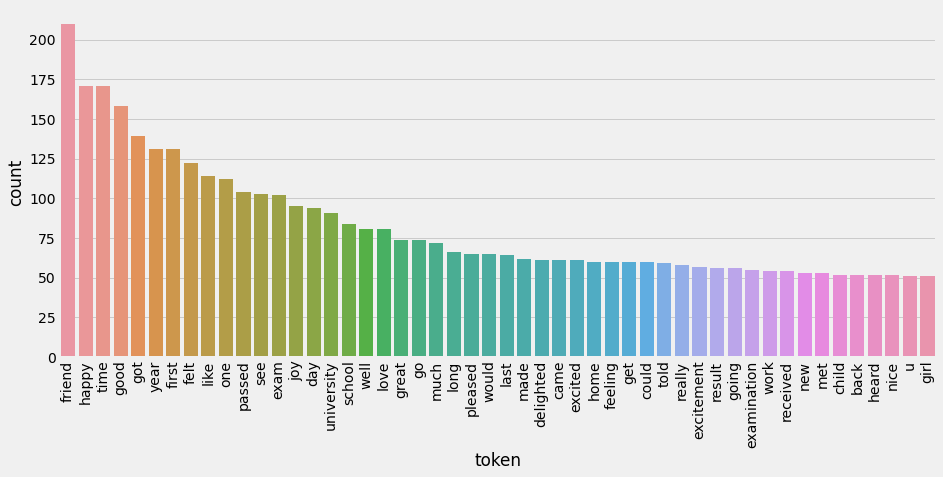

In [46]:
joy_list = df[df['Emotion']=='joy']['Text_Clean'].tolist()
#Document
joy_docx = ' '.join(joy_list)
#Extract keywords
joy_keywords = extract_keywords(joy_docx)
#plot exracted keywords 
plot_most_common_words(joy_keywords)

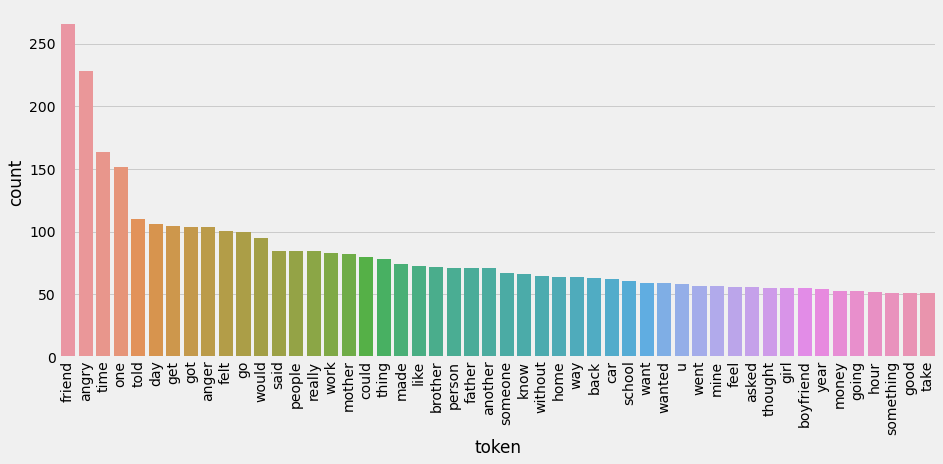

In [47]:
anger_list = df[df['Emotion']=='anger']['Text_Clean'].tolist()
#Document
anger_docx = ' '.join(anger_list)
#Extract keywords
anger_keywords = extract_keywords(anger_docx)
#plot exracted keywords 
plot_most_common_words(anger_keywords)

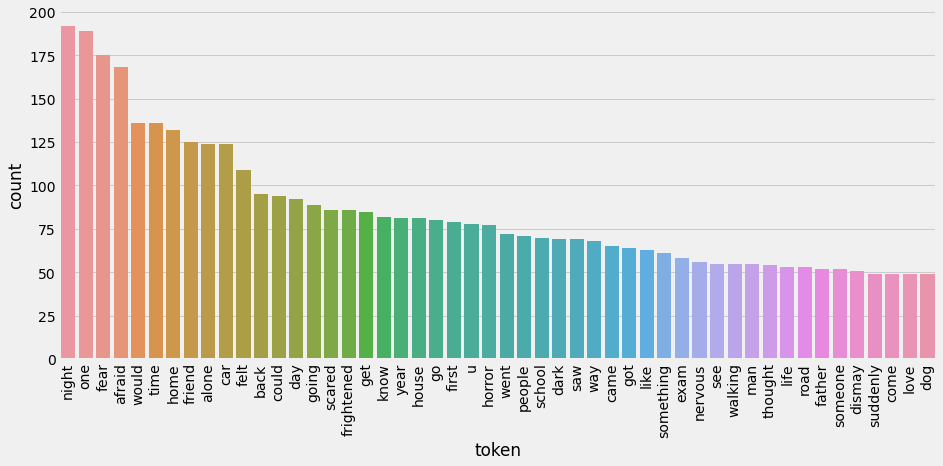

In [48]:
fear_list = df[df['Emotion']=='fear']['Text_Clean'].tolist()
#Document
fear_docx = ' '.join(fear_list)
#Extract keywords
fear_keywords = extract_keywords(fear_docx)
#plot exracted keywords 
plot_most_common_words(fear_keywords)

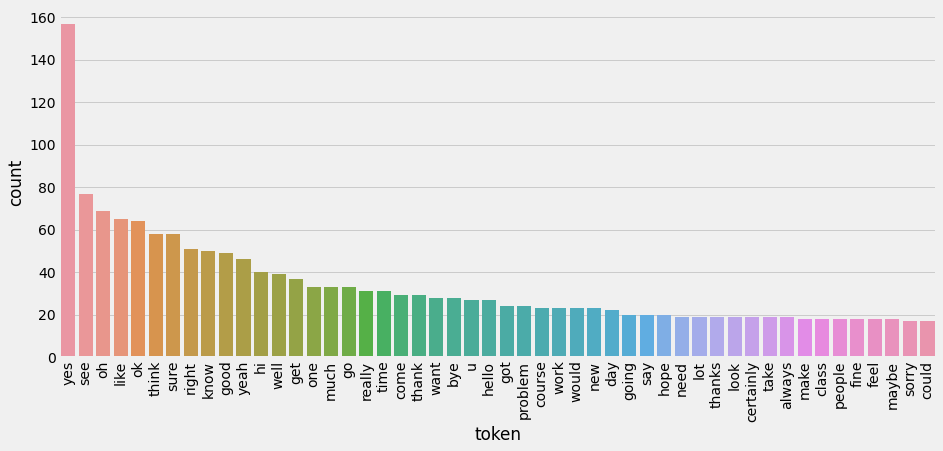

In [49]:

neutral_list = df[df['Emotion']=='neutral']['Text_Clean'].tolist()
#Document
neutral_docx = ' '.join(neutral_list)
#Extract keywords
neutral_keywords = extract_keywords(neutral_docx)
#plot exracted keywords 
plot_most_common_words(neutral_keywords)

In [50]:
# !! pip install wordcloud

In [51]:
from wordcloud import WordCloud

In [52]:
def plot_wordcloud(docs):
    mywordcloud = WordCloud().generate(docs)
    plt.figure(figsize=(14,6))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()


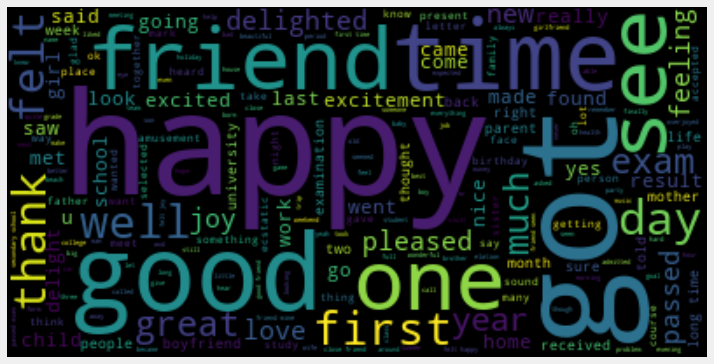

In [53]:
plot_wordcloud(joy_docx)

### Machine Learning 
+ Naive baye
+ knn 
+ DT 
+ logesticRegression

In [140]:
# Ml models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#Evaluation 
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [102]:
features = df['Text_Clean']
y = df['Emotion']

In [107]:
#Vectorizer 
cv = CountVectorizer(analyzer='word',ngram_range=(1,2))
X = cv.fit_transform(features)

In [109]:
# to dense array 
# X.toarray()

In [101]:
# tfidf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
# X = tfidf.fit_transform(features)

In [110]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

### Build Our Model 

In [112]:
nv = MultinomialNB()
nv.fit(x_train,y_train)
nv.score(x_test,y_test)

0.6366578405413357

In [113]:
y_pred_for_nv = nv.predict(x_test)
y_pred_for_nv

array(['joy', 'sadness', 'sadness', ..., 'joy', 'neutral', 'sadness'],
      dtype='<U7')

In [132]:
# logestic regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.696969696969697

In [160]:
y_lr_prediect = lr.predict(x_test)
y_lr_prediect

array(['joy', 'joy', 'anger', ..., 'neutral', 'fear', 'sadness'],
      dtype=object)

In [133]:
# KNN 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.26331273904089436

In [134]:
# DT
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.6095910561929979

In [148]:
#LSVM
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None,loss='hinge')
lsvm.fit(x_train,y_train)
lsvm.score(x_test,y_test)

0.706972639011474

### Make A singel prediction 
+ Vectoriezd our text 
+ Applied our model 

In [149]:
sample_text =["i love football too much "]

In [150]:
vect = cv.transform(sample_text).toarray()

In [157]:
#predict it 
lr.predict(vect)

array(['joy'], dtype=object)

In [158]:
lr.predict_proba(vect)

array([[0.04583766, 0.07297651, 0.43605899, 0.26318593, 0.18194091]])

In [118]:
nv.classes_

array(['anger', 'fear', 'joy', 'neutral', 'sadness'], dtype='<U7')

In [119]:
np.max(nv.predict_proba(vect))

0.5351480094312628

In [120]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_precetage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print("prediction:{}, prediction_score:{}".format(prediction[0],np.max(model.predict_proba(myvect))))
    return pred_precetage_for_all
    

In [121]:
predict_emotion(sample_text,nv)

prediction:joy, prediction_score:0.5351480094312628


{'anger': 0.04856538463021879,
 'fear': 0.07551800154594977,
 'joy': 0.5351480094312628,
 'neutral': 0.055503812959521635,
 'sadness': 0.2852647914330484}

In [159]:
predict_emotion(['I hate you'],lr)

prediction:anger, prediction_score:0.3264341392988907


{'anger': 0.3264341392988907,
 'fear': 0.2195872565496455,
 'joy': 0.0688781701018257,
 'neutral': 0.2913328039281037,
 'sadness': 0.09376763012153445}

In [154]:
predict_emotion(['Hello all'],nv)

prediction:neutral, prediction_score:0.7579951877132249


{'anger': 0.02652686114468427,
 'fear': 0.07543674674176516,
 'joy': 0.08395054086990379,
 'neutral': 0.7579951877132249,
 'sadness': 0.05609066353042129}

In [125]:
predict_emotion(['please open the dooe'],nv)

prediction:neutral, prediction_score:0.3670685619634287


{'anger': 0.15209669941289647,
 'fear': 0.3408612910447193,
 'joy': 0.06002783815200722,
 'neutral': 0.3670685619634287,
 'sadness': 0.0799456094269486}

### Model Evaluation

In [161]:
print(classification_report(y_test,y_lr_prediect))

              precision    recall  f1-score   support

       anger       0.72      0.66      0.69       668
        fear       0.77      0.65      0.71       640
         joy       0.70      0.65      0.67       711
     neutral       0.61      0.85      0.71       687
     sadness       0.75      0.67      0.70       693

    accuracy                           0.70      3399
   macro avg       0.71      0.70      0.70      3399
weighted avg       0.71      0.70      0.70      3399



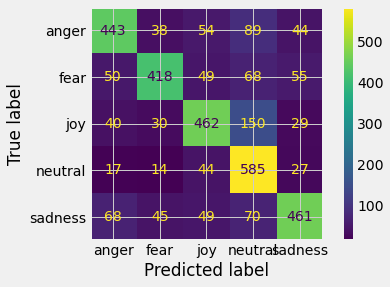

In [166]:
plot_confusion_matrix(lr,x_test,y_test)

### interpret model 

In [164]:
import eli5


In [165]:
eli5.show_weights(lr,top=20)

In [172]:
class_name = y.unique().tolist()

In [174]:
feature_name = cv.get_feature_names()

In [177]:
eli5.show_weights(lr,feature_names=feature_name,target_names=class_name)

### save model 

In [169]:
import joblib

In [170]:
model_file = open("emotion_dedection.pkl","wb")
joblib.dump(lsvm,model_file)
model_file.close()